<a href="https://colab.research.google.com/github/GDharan10/Dataset20_SmsSpamCollection_/blob/main/smsspamcollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [2]:
pip install lazypredict

# **Librarys**

In [3]:
import pandas as pd

#Connections
from google.colab import drive

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor, LazyClassifier

#Machine Learning Training
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# cluster
from sklearn.cluster import KMeans

#Machine Learning Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score # Regression
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score # Classification

In [ ]:
# Report
# from dataprep.eda import create_report
# create_report(df)

# **Connections**

In [4]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [6]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/smsspamcollection.csv'
df = pd.read_csv(file_path,sep="\t")

In [7]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.shape

(5572, 4)

# **DataFrame observation**


In [ ]:
for column in df.columns:
  print(column,'---',df[column].unique())
  print('---------------------------')

In [ ]:
# Dependent -
# Independent -

continuous_columns = ["total_bill", "tip"]
category_columns = ["sex",	"smoker",	"day", "time", "size"]

#Unsupervised

# **Data cleaning using pandas**


Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [ ]:
df.set_index('id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['price'] = df['price'].astype(str).astype(float)
#If you have null value
df['security_deposit'] = df['security_deposit'].astype(str)
df['security_deposit'] = df['security_deposit'].apply(lambda x: float(x) if x != 'None' else None)

df['date'] = pd.to_datetime(df['date'])
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

In [ ]:
df['amenities'] = df['amenities'].apply(lambda x: ', '.join(x))

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
def CentralLimitTheorem(df, continuous_columns, sampling_rate = 0.20):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }
  return oneContinesColumn_result

In [ ]:
def OneTailTest(df, ContinesColumn_result, continuous_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  oneContinesColumn_result = ContinesColumn_result
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"
  return oneContinesColumn_result, hypothesis_df

In [ ]:
def TwoTailTest(df, comperativeColumn_result, continuous_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  hypothesis_df = comperativeColumn_result
  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"
  return hypothesis_df

In [ ]:
def ChiSquareTest(df, comperativeColumn_result, category_columns = []):
  df = df
  hypothesis_df = comperativeColumn_result
  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"
  return hypothesis_df

In [ ]:
def ANOVA(df, comperativeColumn_result, continuous_columns = [], category_columns = []):
  df = df
  hypothesis_df = comperativeColumn_result

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return hypothesis_df

In [ ]:
ContinesColumn_result = CentralLimitTheorem(df, continuous_columns)

In [ ]:
ContinesColumn_result, comperativeColumn_result = OneTailTest(df, ContinesColumn_result, continuous_columns, sampling_rate = 0.02)

In [ ]:
comperativeColumn_result = TwoTailTest(df, comperativeColumn_result, continuous_columns, sampling_rate = 0.02)

In [ ]:
comperativeColumn_result = ChiSquareTest(df, comperativeColumn_result, category_columns)

In [ ]:
comperativeColumn_result = ANOVA(df, comperativeColumn_result, continuous_columns, category_columns)

# Correlation

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,total_bill,tip
Population Mean,19.785943,2.998279
Sample Means,{19.680828124999998},{3.0878958333333335}
H0_accepted,26,21
H0_rejected,22,27
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig..."


In [ ]:
comperativeColumn_result

,total_bill,tip,sex,smoker,day,time,size
total_bill,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship
tip,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship
sex,There is no relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship
smoker,There is a relationship,There is a relationship,There is no relationship,NaN,There is a relationship,There is no relationship,There is no relationship
day,There is no relationship,There is a relationship,There is a relationship,There is a relationship,NaN,There is a relationship,There is a relationship
time,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,NaN,There is a relationship
size,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,NaN


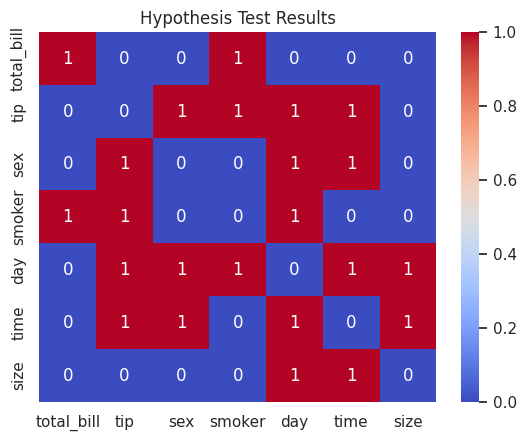

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 0, 'There is no relationship': 1}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-30-ebcbbf98ef30>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Preprocessing**

In [ ]:
# Replacing categorical values with numerical equivalents

In [ ]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
# Using encoder
encode=OrdinalEncoder()
df.sex=encode.fit_transform(df[["sex"]])
df.smoker=encode.fit_transform(df[["smoker"]])
df.day=encode.fit_transform(df[["day"]])
df.time=encode.fit_transform(df[["time"]])

In [ ]:
# Using encoder with loop
columns=["sex", "smoker", "day", "time"]
encode=OrdinalEncoder()

before_encoding = {}
after_encoding = {}
encoded = {}

for column in columns:
  before_encoding[column] = df[column].unique()
  df[column] = encode.fit_transform(df[[column]])
  after_encoding[column] = df[column].unique()
  encoded[column] = {before_encoding[column][i]: after_encoding[column][i] for i in range(len(before_encoding[column]))}

# Decode with loop
for column in columns:
  test_df[column] = test_df[column].map(encoded[column])

In [ ]:
# Using Map and Replace
df['sex'] = df['sex'].map({'Female': 101, 'Male': 102})
df['smoker'] = df['smoker'].map({'No': 201, 'Yes': 202})
df['day'] = df['day'].replace({'Sun': 301, 'Thur': 302, 'Fri': 303, 'Sat' : 304})
df['time'] = df['time'].replace({'Dinner': 401, 'Lunch': 402})
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,101,201,301,401,2
1,10.34,1.66,102,201,301,401,3
2,21.01,3.50,102,201,301,401,3
3,23.68,3.31,102,201,301,401,2
4,24.59,3.61,101,201,301,401,4
...,...,...,...,...,...,...,...
239,29.03,5.92,102,201,304,401,3
240,27.18,2.00,101,202,304,401,2
241,22.67,2.00,102,202,304,401,2
242,17.82,1.75,102,201,304,401,2


# **Normalizing the dataset (Imbalance to balance dataset)**

https://imbalanced-learn.org/stable/references/under_sampling.html#

In [ ]:
x=df.drop(['Class'], axis=1)
y=df['Class']

In [ ]:
#under sampling
from imblearn.under_sampling import NearMiss
model = NearMiss()
x_new, y_new = model.fit_resample(x,y)
x_new.shape, y_new.shape

In [ ]:
#over sampling
from imblearn.combine import SMOTETomek
model = SMOTETomek()
xnew, ynew = model.fit_resample(x,y)
xnew.shape, ynew.shape

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent (Only for Supervised)
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

**2 separating independent and dependent**

(Only for Supervised)
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# 2 separating independent and dependent
x=df.drop("Dependent_column",axis=1)
y=df["Dependent_column"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

**3 Identifying algorithms/Model:**

Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning

https://pypi.org/project/lazypredict/

In [ ]:
# Regression
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

In [ ]:
# Classification
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

**4 training**

https://scikit-learn.org/stable/supervised_learning.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)

**5 Evaluation**

Metrics and scoring: quantifying the quality of predictions

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
input = np.array([[7,29,3,1,2,9,27,142,4,2]])
prediction = model.predict(input)
prediction

In [ ]:
# Regression
AS = accuracy_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

AS, mse, r2

In [ ]:
# Classification
kas = top_k_accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

kas, ps, rs

# **Supervised Regression - Linear regression**

Step 1: Data Availability:
Ensure you have your independent variable(s) x1 and dependent variable y

Step 2: Separating Independent and Dependent Variables:

x1 = Independent_variable_data

y = Dependent_variable_data

Step 3: Creating and Fitting the Model
Add a constant term to the independent variable:

x = sm.add_constant(x1)

Step 4: Create an Ordinary Least Squares (OLS) model:

model = sm.OLS(y, x)

Step 5: Traing the model:

result = model.fit()

Step 6: Evaluation:
Print the summary of the regression results

print(result.summary())

Step 7: Predictions:
Predict y values based on the fitted model

yhat = result.predict(x)


In [ ]:
'''
x1 = df.independent_column
y = df.dependent_column
x = sm.add_constant(x1)
model = sm.OLS(y,x)
result = model.fit()
result.summary()
yhat = result.params[0]+result.params[1]* x1
'''

# **Supervised Classification**

**Logistic regression**

x1 = Independent

y = Dependent

x=sm.add_constant(x1)

result_log = sm.Logit(y,x).fit()

result_log.pred_table()

confusion_matrix_df=pd.DataFrame(result_log.pred_table())

confusion_matrix=np.array(confusion_matrix_df)

acc=(confusion_matrix[0,0]+confusion_matrix[1,1])/confusion_matrix.sum()

result_log.summary()

# **Unsupervised Clustering**

In [ ]:
wcss = []
for i in range(1,245):
  model = KMeans(i)
  model.fit(df)
  wcss.append(model.inertia_)
print(wcss)

In [ ]:
plt.plot(range(1,35), wcss[0:34])
plt.show()

In [ ]:
result = KMeans(15).fit(df)

In [ ]:
identify_cluster = result.fit_predict(df)
df['cluster'] = identify_cluster

In [ ]:
df.cluster.value_counts()

In [ ]:
sns.clustermap(df)

In [ ]:
df[df['cluster'] == 11]

In [ ]:
pd.set_option('display.max_rows',None)
df